# 주제 : 서울시 교통사고 분석

## 1. 데이터수집
+ http://taas.koroad.or.kr/web/shp/sbm/initUnityAnalsSys.do?menuId=WEB_KMP_OVT_UAS

In [572]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name() #한글이 깨지지않고 나오도록
plt.rc('font', family=font_name)

mpl.rcParams['axes.unicode_minus'] = False

#### 가해차량별 사고데이터 불러오기 (2019년)

In [455]:
car_accident1=pd.read_excel("C:/Users/user/Desktop/교통사고 데이터/서울시가해차량별사고데이터.xls",encoding="euc-kr", thousands=".")
car_accident1.head()

,시도,시군구,사고년도,합계,승용차,승합차,화물차,특수차,이륜차,사륜오토바이(ATV),원동기장치자전거,자전거,개인형이동수단(PM),건설기계,농기계,기타,불명
0,서울,합계,사고건수,39258,25262,2959,3205,88,4064,11,550,1766,134,285,-,42,892
1,서울,합계,사망자수,250,111,27,35,0,43,1,5,11,1,15,-,1,0
2,서울,합계,부상자수,53904,36031,4229,4197,125,5187,13,671,1950,139,375,-,43,944
3,서울,종로구,사고건수,1133,732,120,79,1,99,-,38,19,1,5,-,2,37
4,서울,종로구,사망자수,6,2,0,1,0,2,-,0,1,0,0,-,0,0


#### 법규위반별 사고데이터 불러오기(2019년)

In [485]:
car_accident2=pd.read_excel("C:/Users/user/Desktop/교통사고 데이터/서울시법규위반별사고데이터.xls",encoding="euc-kr", thousands=".",header=1)
car_accident2.head()

,시도,시군구,사고년도,합계,합계.1,과로,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,...,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,철길건널목 통과방법위반,긴급자동차에대한 피양의무 위반,기타(운전자법규위반),합계.2,정비불량 제차의 운전금지위반
0,서울,합계,사고건수,39258,39257,-,102,20,17,1074,...,21842,1325,1515,701,774,-,-,1409,1,1
1,서울,합계,사망자수,250,250,-,23,0,0,12,...,147,0,13,1,2,-,-,4,0,0
2,서울,합계,부상자수,53904,53900,-,159,27,22,1609,...,28990,1868,1589,1085,1109,-,-,1577,4,4
3,서울,종로구,사고건수,1133,1133,-,-,1,1,24,...,613,45,40,16,9,-,-,39,-,-
4,서울,종로구,사망자수,6,6,-,-,0,0,0,...,6,0,0,0,0,-,-,0,-,-


#### 연령별 사고데이터 불러오기(2019년)

In [537]:
car_accident3=pd.read_excel("C:/Users/user/Desktop/교통사고 데이터/서울시연령별사고데이터.xls",encoding="euc-kr", thousands=".")
car_accident3.head()

,시도,시군구,사고년도,합계,20세이하,21~30세,31~40세,41~50세,51~60세,61~64세,65세이상,미분류
0,서울,합계,사고건수,39258,1317,5053,6216,7004,9271,3561,5886,950
1,서울,합계,사망자수,250,11,29,26,45,65,25,49,0
2,서울,합계,부상자수,53904,1760,7197,8740,9693,12693,4933,7881,1007
3,서울,종로구,사고건수,1133,20,135,165,199,287,99,190,38
4,서울,종로구,사망자수,6,0,2,0,2,0,2,0,0


## 2. 탐색적 데이터 분석(EDA)과 전처리

질문
1. 서울시에서 어떤 차량이 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지.
2. 서울시에서 어떤 위반이 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지. 
3. 서울시에서 어떤 연령이 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지.
4. 서울시 무슨 구에서 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지.

전처리
1. 결측치 -를 0으로 변환
2. 칼럼명 변경(예 : 사고년도)
3. 기타로 그룹화(가장높은 열 5개 제외한 나머지)


#### 가해차량별 사고데이터 전처리 

In [458]:
# 결측치 -를 0으로 변환
car_accident1.replace("-",0,inplace=True)

In [459]:
# 상위 5개 열을 제외한 나머지를 기타차량으로 만들기
car_accident1.head(1)
car_accident1["기타차량"] = car_accident1["사륜오토바이(ATV)"]+car_accident1["원동기장치자전거"]+car_accident1["특수차"]+car_accident1["개인형이동수단(PM)"]+car_accident1["건설기계"]+car_accident1["농기계"]+car_accident1["기타"]+car_accident1["불명"]

In [460]:
# 필요없는 변수 제거
del car_accident1["사륜오토바이(ATV)"]
del car_accident1["원동기장치자전거"]
del car_accident1["특수차"]
del car_accident1["개인형이동수단(PM)"]
del car_accident1["건설기계"]
del car_accident1["농기계"]
del car_accident1["기타"]
del car_accident1["불명"]
del car_accident1["시도"]

In [461]:
# 칼럼이름 변경
car_accident1.rename(columns={"사고년도" : "종류","시군구" : "구별"}, inplace = True)

In [462]:
car_accident1.head()

,구별,종류,합계,승용차,승합차,화물차,이륜차,자전거,기타차량
0,합계,사고건수,39258,25262,2959,3205,4064,1766,2002
1,합계,사망자수,250,111,27,35,43,11,23
2,합계,부상자수,53904,36031,4229,4197,5187,1950,2310
3,종로구,사고건수,1133,732,120,79,99,19,84
4,종로구,사망자수,6,2,0,1,2,1,0


In [412]:
# 1. 서울시에서 어떤 차량이 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지.
car_accident1.head(1) # 승용차 사고건수가 가장 많음
car_accident1[1:2] # 승용차 사망자수가 가장 많음



,구별,종류,합계,승용차,승합차,화물차,이륜차,자전거,기타차량
1,합계,사망자수,250,111,27,35,43,11,23


In [413]:
# 전체 합 행 지우고 새로운 데이터명 할당
ncar_accident1 = car_accident1[:]
ncar_accident1.drop([0],inplace=True)
ncar_accident1.drop([1],inplace=True)
ncar_accident1.drop([2],inplace=True)


In [414]:
ncar_accident1

,구별,종류,합계,승용차,승합차,화물차,이륜차,자전거,기타차량
3,종로구,사고건수,1133,732,120,79,99,19,84
4,종로구,사망자수,6,2,0,1,2,1,0
5,종로구,부상자수,1559,1027,182,106,126,18,100
6,중구,사고건수,1184,764,122,84,109,23,82
7,중구,사망자수,5,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...
73,강북구,사망자수,7,0,0,1,4,2,0
74,강북구,부상자수,1706,1061,158,136,260,62,29
75,금천구,사고건수,920,518,94,99,120,40,49
76,금천구,사망자수,9,4,1,2,1,1,0


In [415]:
# 종류별로 데이터 분리
# 사고건수만 모아서 저장하기
is_count = ncar_accident1['종류'] == '사고건수'
ncar_accident11=ncar_accident1[is_count]

del ncar_accident11["종류"]
#사망자수만 모아서 저장하기
is_dead = ncar_accident1['종류'] == '사망자수'
ncar_accident12=ncar_accident1[is_dead]
del ncar_accident12["종류"]

#부상자수만 모아서 저장하기
is_sick = ncar_accident1['종류'] == '부상자수'
ncar_accident13=ncar_accident1[is_sick]
del ncar_accident13["종류"]

In [416]:
# 구별 컬럼을 인덱스로 변경
ncar_accident11.set_index("구별", inplace=True)
ncar_accident12.set_index("구별", inplace=True)
ncar_accident13.set_index("구별", inplace=True)

In [417]:
# 사고건수 대비 사망자수를 위한 새로운 데이터 
ncar_accident14 = ncar_accident13[:]

In [418]:
#  사고건수 대비 사망자수 구하기
ncar_accident14["승용차비율"] = ncar_accident12["승용차"]/ ncar_accident11["승용차"]
ncar_accident14["승합차비율"] = ncar_accident12["승합차"]/ ncar_accident11["승합차"]
ncar_accident14["화물차비율"] = ncar_accident12["화물차"]/ ncar_accident11["화물차"]
ncar_accident14["이륜차비율"] = ncar_accident12["이륜차"]/ ncar_accident11["이륜차"]
ncar_accident14["자전거비율"] = ncar_accident12["자전거"]/ ncar_accident11["자전거"]
ncar_accident14["기타차량비율"] = ncar_accident12["기타차량"]/ ncar_accident11["기타차량"]



<ipython-input-418-02bddc2c3524>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident14["승용차비율"] = ncar_accident12["승용차"]/ ncar_accident11["승용차"]
<ipython-input-418-02bddc2c3524>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident14["승합차비율"] = ncar_accident12["승합차"]/ ncar_accident11["승합차"]
<ipython-input-418-02bddc2c3524>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [419]:
del ncar_accident14["승용차"]
del ncar_accident14["승합차"]
del ncar_accident14["화물차"]
del ncar_accident14["이륜차"]
del ncar_accident14["자전거"]
del ncar_accident14["기타차량"]
del ncar_accident14["합계"]

In [470]:
#ncar_accident11.head()
#ncar_accident12.head()
ncar_accident13.head()

,합계,승용차,승합차,화물차,이륜차,자전거,기타차량
구별,,,,,,,
종로구,1559,1027,182,106,126,18,100
중구,1615,1125,150,102,129,25,84
용산구,1614,1222,69,118,122,23,60
성동구,1439,944,79,131,152,68,65
동대문구,1988,1153,125,223,277,120,90


In [465]:
# 사고건수 대비 사망자비율(차량별) 
ncar_accident14.head()

TypeError: head() got an unexpected keyword argument 'ascending'

#### 법규위반별 사고데이터 전처리

In [486]:
# 결측치 -를 0으로 변환
car_accident2.replace("-",0,inplace=True)

In [487]:
# 하위 5개 열을 기타위반으로 만들기
car_accident2.head(1)
car_accident2["기타위반"] = car_accident2["과로"]+car_accident2["철길건널목 통과방법위반"]+car_accident2["긴급자동차에대한 피양의무 위반"]+car_accident2["통행우선 순위위반"]+car_accident2["정비불량 제차의 운전금지위반"]

In [488]:
# 필요없는 변수 제거
del car_accident2["과로"]
del car_accident2["철길건널목 통과방법위반"]
del car_accident2["긴급자동차에대한 피양의무 위반"]
del car_accident2["통행우선 순위위반"]
del car_accident2["정비불량 제차의 운전금지위반"]
del car_accident2["합계.2"]
del car_accident2["합계.1"]
del car_accident2["시도"]

In [489]:
# 칼럼이름 변경
car_accident2.rename(columns={"사고년도" : "종류", "시군구": "구별"}, inplace = True)

In [490]:
car_accident2.head()

,구별,종류,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
0,합계,사고건수,39258,102,20,17,1074,4898,5259,43,267,7,21842,1325,1515,701,774,1409,5
1,합계,사망자수,250,23,0,0,12,38,7,0,3,0,147,0,13,1,2,4,0
2,합계,부상자수,53904,159,27,22,1609,7411,8059,58,320,9,28990,1868,1589,1085,1109,1577,12
3,종로구,사고건수,1133,0,1,1,24,155,188,0,2,0,613,45,40,16,9,39,0
4,종로구,사망자수,6,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0


In [491]:
# 2. 서울시에서 어떤 위반이 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지.
car_accident2.head(1) # 안전운전의무 불이행 사고건수가 가장 많음
car_accident2[1:2] # 안전운전의무 불이행 사망자수가 가장 많음

,구별,종류,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
1,합계,사망자수,250,23,0,0,12,38,7,0,3,0,147,0,13,1,2,4,0


In [492]:
# 전체 합 행 지우고 새로운 데이터명 할당
ncar_accident2 = car_accident2[:]
ncar_accident2.drop([0],inplace=True)
ncar_accident2.drop([1],inplace=True)
ncar_accident2.drop([2],inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [493]:
ncar_accident2

,구별,종류,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
3,종로구,사고건수,1133,0,1,1,24,155,188,0,2,0,613,45,40,16,9,39,0
4,종로구,사망자수,6,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0
5,종로구,부상자수,1559,0,1,3,42,252,268,0,2,0,795,66,40,30,13,47,0
6,중구,사고건수,1184,4,0,0,28,174,279,0,3,0,576,29,41,3,7,40,0
7,중구,사망자수,5,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,강북구,사망자수,7,0,0,0,1,2,0,0,1,0,3,0,0,0,0,0,0
74,강북구,부상자수,1706,4,1,1,71,208,196,2,8,1,942,55,53,10,88,66,0
75,금천구,사고건수,920,2,0,0,32,133,102,1,2,0,547,6,39,10,8,38,0
76,금천구,사망자수,9,0,0,0,1,2,0,0,0,0,4,0,2,0,0,0,0


In [494]:
# 종류별로 데이터 분리
# 사고건수만 모아서 저장하기
is_count = ncar_accident2['종류'] == '사고건수'
ncar_accident21=ncar_accident2[is_count]

del ncar_accident21["종류"]
#사망자수만 모아서 저장하기
is_dead = ncar_accident2['종류'] == '사망자수'
ncar_accident22=ncar_accident2[is_dead]
del ncar_accident22["종류"]

#부상자수만 모아서 저장하기
is_sick = ncar_accident2['종류'] == '부상자수'
ncar_accident23=ncar_accident2[is_sick]
del ncar_accident23["종류"]

In [495]:
# 구별 컬럼을 인덱스로 변경
ncar_accident21.set_index("구별", inplace=True)
ncar_accident22.set_index("구별", inplace=True)
ncar_accident23.set_index("구별", inplace=True)

In [496]:
# 사고건수 대비 사망자수를 위한 새로운 데이터 
ncar_accident24 = ncar_accident23[:]

In [497]:
#  사고건수 대비 사망자수 구하기
ncar_accident24["과속비율"] = ncar_accident22["과속"]/ ncar_accident21["과속"]
ncar_accident24["앞지르기 방법위반비율"] = ncar_accident22["앞지르기 방법위반"]/ ncar_accident21["앞지르기 방법위반"]
ncar_accident24["앞지르기 금지위반비율"] = ncar_accident22["앞지르기 금지위반"]/ ncar_accident21["앞지르기 금지위반"]
ncar_accident24["중앙선 침범비율"] = ncar_accident22["중앙선 침범"]/ ncar_accident21["중앙선 침범"]
ncar_accident24["신호위반비율"] = ncar_accident22["신호위반"]/ ncar_accident21["신호위반"]
ncar_accident24["안전거리 미확보비율"] = ncar_accident22["안전거리 미확보"]/ ncar_accident21["안전거리 미확보"]
ncar_accident24["서행 및 일시정지위반비율"] = ncar_accident22["서행 및 일시정지위반"]/ ncar_accident21["서행 및 일시정지위반"]
ncar_accident24["부당한 회전비율"] = ncar_accident22["부당한 회전"]/ ncar_accident21["부당한 회전"]
ncar_accident24["진로양보 의무 불이행비율"] = ncar_accident22["진로양보 의무 불이행"]/ ncar_accident21["진로양보 의무 불이행"]
ncar_accident24["안전운전 의무 불이행비율"] = ncar_accident22["안전운전 의무 불이행"]/ ncar_accident21["안전운전 의무 불이행"]
ncar_accident24["교차로 통행방법 위반비율"] = ncar_accident22["교차로 통행방법 위반"]/ ncar_accident21["교차로 통행방법 위반"]
ncar_accident24["보행자 보호의무 위반비율"] = ncar_accident22["보행자 보호의무 위반"]/ ncar_accident21["보행자 보호의무 위반"]
ncar_accident24["차로위반(진로변경 위반)비율"] = ncar_accident22["차로위반(진로변경 위반)"]/ ncar_accident21["차로위반(진로변경 위반)"]
ncar_accident24["직진 및 우회전차의 통행방해비율"] = ncar_accident22["직진 및 우회전차의 통행방해"]/ ncar_accident21["직진 및 우회전차의 통행방해"]
ncar_accident24["기타(운전자법규위반)비율"] = ncar_accident22["기타(운전자법규위반)"]/ ncar_accident21["기타(운전자법규위반)"]
ncar_accident24["기타위반비율"] = ncar_accident22["기타위반"]/ ncar_accident21["기타위반"]

<ipython-input-497-2a24f75be28d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident24["과속비율"] = ncar_accident22["과속"]/ ncar_accident21["과속"]
<ipython-input-497-2a24f75be28d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident24["앞지르기 방법위반비율"] = ncar_accident22["앞지르기 방법위반"]/ ncar_accident21["앞지르기 방법위반"]
<ipython-input-497-2a24f75be28d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [498]:
# 0/0으로 인한 NaN발생. NaN을 0으로 대체
ncar_accident24.fillna(0,inplace=True)
ncar_accident24

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,...,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율
구별,,,,,,,,,,,,,,,,,,,,,
종로구,1559,0,1,3,42,252,268,0,2,0,...,0.0,0.000000,0.0,0.009788,0.0,0.000000,0.000000,0.000000,0.000000,0.0
중구,1615,8,0,0,49,260,422,0,4,0,...,0.0,0.000000,0.0,0.006944,0.0,0.000000,0.000000,0.000000,0.000000,0.0
용산구,1614,8,2,1,67,176,301,0,5,0,...,0.0,0.000000,0.0,0.010386,0.0,0.000000,0.000000,0.000000,0.033333,0.0
성동구,1439,4,0,0,30,202,272,0,8,0,...,0.0,0.000000,0.0,0.015280,0.0,0.031250,0.000000,0.038462,0.000000,0.0
동대문구,1988,3,0,2,60,286,322,2,15,1,...,0.0,0.000000,0.0,0.009780,0.0,0.000000,0.000000,0.000000,0.000000,0.0
성북구,2007,3,3,1,58,304,337,0,2,0,...,0.0,0.000000,0.0,0.007772,0.0,0.029851,0.000000,0.000000,0.000000,0.0
도봉구,1163,8,1,0,36,232,108,0,7,0,...,0.0,0.000000,0.0,0.008989,0.0,0.000000,0.000000,0.000000,0.000000,0.0
은평구,1464,0,4,2,55,286,96,1,10,0,...,0.0,0.000000,0.0,0.003140,0.0,0.019608,0.047619,0.066667,0.000000,0.0
서대문구,1609,1,0,1,60,337,143,0,11,0,...,0.0,0.000000,0.0,0.019847,0.0,0.000000,0.000000,0.000000,0.000000,0.0


In [499]:
# 필요없는 변수 제거
del ncar_accident24["과속"]
del ncar_accident24["앞지르기 방법위반"]
del ncar_accident24["앞지르기 금지위반"]
del ncar_accident24["중앙선 침범"]
del ncar_accident24["신호위반"]
del ncar_accident24["안전거리 미확보"]
del ncar_accident24["서행 및 일시정지위반"]
del ncar_accident24["부당한 회전"]
del ncar_accident24["진로양보 의무 불이행"]
del ncar_accident24["안전운전 의무 불이행"]
del ncar_accident24["교차로 통행방법 위반"]
del ncar_accident24["보행자 보호의무 위반"]
del ncar_accident24["차로위반(진로변경 위반)"]
del ncar_accident24["직진 및 우회전차의 통행방해"]
del ncar_accident24["기타(운전자법규위반)"]
del ncar_accident24["기타위반"]
del ncar_accident24["합계"]


In [505]:
#ncar_accident21.head()
#ncar_accident22.head()
ncar_accident23.head()

,합계,과속,앞지르기 방법위반,앞지르기 금지위반,중앙선 침범,신호위반,안전거리 미확보,서행 및 일시정지위반,부당한 회전,진로양보 의무 불이행,안전운전 의무 불이행,교차로 통행방법 위반,보행자 보호의무 위반,차로위반(진로변경 위반),직진 및 우회전차의 통행방해,기타(운전자법규위반),기타위반
구별,,,,,,,,,,,,,,,,,
종로구,1559,0,1,3,42,252,268,0,2,0,795,66,40,30,13,47,0
중구,1615,8,0,0,49,260,422,0,4,0,737,37,44,5,8,41,0
용산구,1614,8,2,1,67,176,301,0,5,0,909,30,47,28,9,31,0
성동구,1439,4,0,0,30,202,272,0,8,0,745,60,32,24,35,27,0
동대문구,1988,3,0,2,60,286,322,2,15,1,1008,52,57,27,87,61,5


In [501]:
# 사고건수 대비 사망자비율(차량별) 
ncar_accident24.head()

,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율
구별,,,,,,,,,,,,,,,,
종로구,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.009788,0.0,0.00000,0.0,0.000000,0.000000,0.0
중구,0.000000,0.0,0.0,0.000000,0.005747,0.00000,0.0,0.0,0.0,0.006944,0.0,0.00000,0.0,0.000000,0.000000,0.0
용산구,0.166667,0.0,0.0,0.000000,0.000000,0.00463,0.0,0.0,0.0,0.010386,0.0,0.00000,0.0,0.000000,0.033333,0.0
성동구,0.000000,0.0,0.0,0.000000,0.013072,0.00000,0.0,0.0,0.0,0.015280,0.0,0.03125,0.0,0.038462,0.000000,0.0
동대문구,0.500000,0.0,0.0,0.022222,0.018957,0.00000,0.0,0.0,0.0,0.009780,0.0,0.00000,0.0,0.000000,0.000000,0.0


#### 연령별 사고데이터 전처리

In [538]:
# 칼럼이름 변경
car_accident3.rename(columns={"사고년도" : "종류", "시군구": "구별"}, inplace = True)

# 시도 칼럼 지우기
del car_accident3["시도"]

In [539]:
car_accident3.head()

,구별,종류,합계,20세이하,21~30세,31~40세,41~50세,51~60세,61~64세,65세이상,미분류
0,합계,사고건수,39258,1317,5053,6216,7004,9271,3561,5886,950
1,합계,사망자수,250,11,29,26,45,65,25,49,0
2,합계,부상자수,53904,1760,7197,8740,9693,12693,4933,7881,1007
3,종로구,사고건수,1133,20,135,165,199,287,99,190,38
4,종로구,사망자수,6,0,2,0,2,0,2,0,0


In [540]:
# 3. 서울시에서 어떤 연령이 사고건수와 사망자수, 사고건수 대비 사망자수가 높은지.
car_accident3.head(1) # 51~60세 사고건수가 가장 많음
car_accident3[1:2] # 51~60세 사망자수가 가장 많음

,구별,종류,합계,20세이하,21~30세,31~40세,41~50세,51~60세,61~64세,65세이상,미분류
1,합계,사망자수,250,11,29,26,45,65,25,49,0


In [541]:
# 전체 합 행 지우고 새로운 데이터명 할당
ncar_accident3 = car_accident3
ncar_accident3.drop([0],inplace=True)
ncar_accident3.drop([1],inplace=True)
ncar_accident3.drop([2],inplace=True)

In [542]:
ncar_accident3

,구별,종류,합계,20세이하,21~30세,31~40세,41~50세,51~60세,61~64세,65세이상,미분류
3,종로구,사고건수,1133,20,135,165,199,287,99,190,38
4,종로구,사망자수,6,0,2,0,2,0,2,0,0
5,종로구,부상자수,1559,32,187,241,264,399,118,276,42
6,중구,사고건수,1184,9,149,186,191,296,109,213,31
7,중구,사망자수,5,0,0,0,2,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
73,강북구,사망자수,7,1,2,1,0,2,0,1,0
74,강북구,부상자수,1706,67,271,249,293,398,153,257,18
75,금천구,사고건수,920,27,125,133,173,229,82,125,26
76,금천구,사망자수,9,1,0,0,4,2,0,2,0


In [543]:
# 종류별로 데이터 분리
# 사고건수만 모아서 저장하기
is_count = ncar_accident3['종류'] == '사고건수'
ncar_accident31=ncar_accident3[is_count]
del ncar_accident31["종류"]

#사망자수만 모아서 저장하기
is_dead = ncar_accident3['종류'] == '사망자수'
ncar_accident32=ncar_accident3[is_dead]
del ncar_accident32["종류"]

#부상자수만 모아서 저장하기
is_sick = ncar_accident3['종류'] == '부상자수'
ncar_accident33=ncar_accident3[is_sick]
del ncar_accident33["종류"]

In [544]:
# 구별 컬럼을 인덱스로 변경
ncar_accident31.set_index("구별", inplace=True)
ncar_accident32.set_index("구별", inplace=True)
ncar_accident33.set_index("구별", inplace=True)

In [545]:
# 사고건수 대비 사망자수를 위한 새로운 데이터 
ncar_accident34 = ncar_accident33[:]

In [546]:
# 사고건수 대비 사망자수 구하기
ncar_accident34["20세이하비율"] = ncar_accident32["20세이하"]/ ncar_accident31["20세이하"]
ncar_accident34["21~30세비율"] = ncar_accident32["21~30세"]/ ncar_accident31["21~30세"]
ncar_accident34["31~40세비율"] = ncar_accident32["31~40세"]/ ncar_accident31["31~40세"]
ncar_accident34["41~50세비율"] = ncar_accident32["41~50세"]/ ncar_accident31["41~50세"]
ncar_accident34["51~60세비율"] = ncar_accident32["51~60세"]/ ncar_accident31["51~60세"]
ncar_accident34["61~64세비율"] = ncar_accident32["61~64세"]/ ncar_accident31["61~64세"]
ncar_accident34["65세이상비율"] = ncar_accident32["65세이상"]/ ncar_accident31["65세이상"]
ncar_accident34["미분류비율"] = ncar_accident32["미분류"]/ ncar_accident31["미분류"]

<ipython-input-546-24492652f7ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident34["20세이하비율"] = ncar_accident32["20세이하"]/ ncar_accident31["20세이하"]
<ipython-input-546-24492652f7ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncar_accident34["21~30세비율"] = ncar_accident32["21~30세"]/ ncar_accident31["21~30세"]
<ipython-input-546-24492652f7ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [547]:
# 필요없는 변수 제거
del ncar_accident34["20세이하"]
del ncar_accident34["21~30세"]
del ncar_accident34["31~40세"]
del ncar_accident34["41~50세"]
del ncar_accident34["51~60세"]
del ncar_accident34["61~64세"]
del ncar_accident34["65세이상"]
del ncar_accident34["미분류"]
del ncar_accident34["합계"]


In [548]:
#ncar_accident31.head()
#ncar_accident32.head()
ncar_accident33.head()

,합계,20세이하,21~30세,31~40세,41~50세,51~60세,61~64세,65세이상,미분류
구별,,,,,,,,,
종로구,1559,32,187,241,264,399,118,276,42
중구,1615,9,220,240,279,396,154,284,33
용산구,1614,33,265,254,259,353,150,249,51
성동구,1439,43,192,233,236,362,126,206,41
동대문구,1988,76,216,294,339,488,186,364,25


In [519]:
ncar_accident34.head()

,20세이하비율,21~30세비율,31~40세비율,41~50세비율,51~60세비율,61~64세비율,65세이상비율,미분류비율
구별,,,,,,,,
종로구,0.000000,0.014815,0.000000,0.010050,0.000000,0.020202,0.000000,0.0
중구,0.000000,0.000000,0.000000,0.010471,0.006757,0.000000,0.004695,0.0
용산구,0.000000,0.012048,0.000000,0.000000,0.007380,0.000000,0.032609,0.0
성동구,0.000000,0.006667,0.011561,0.005236,0.012245,0.039604,0.012821,0.0
동대문구,0.016667,0.006452,0.012821,0.003745,0.012821,0.006757,0.010417,0.0


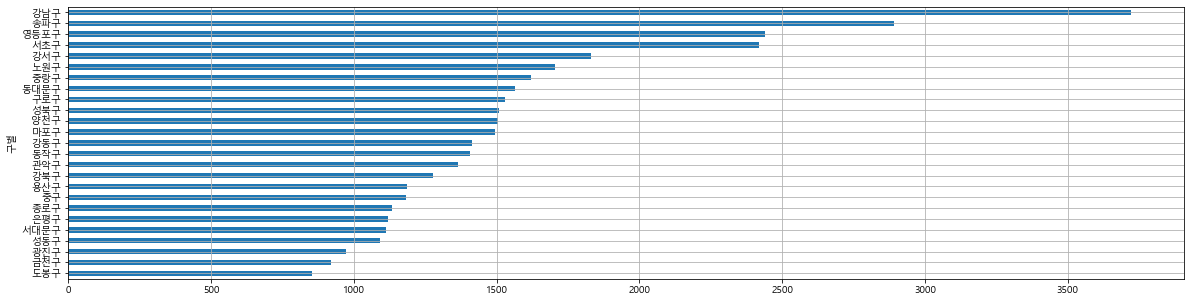

In [445]:
# 4.구별 사고건수 그래프 그리기

ncar_accident31.sort_values(by="합계",ascending=False).head()
# 사고건수가 높은 강남구, 송파구, 영등포구, 서초구, 강서구

ncar_accident31["합계"].sort_values().plot(kind="barh",figsize=(20,5),grid=True)

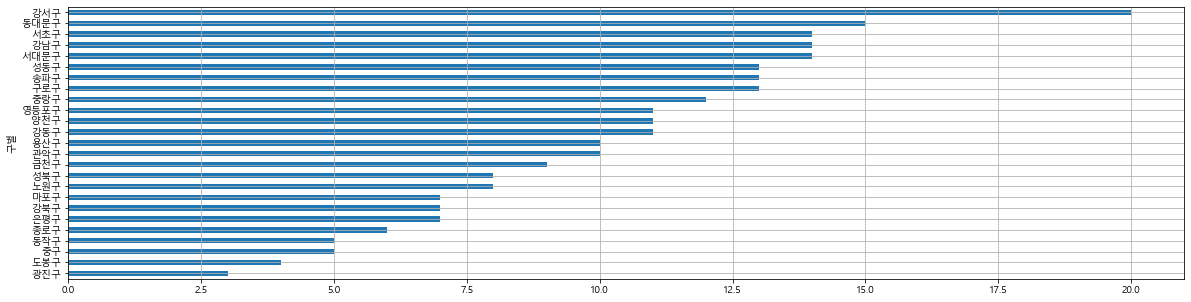

In [446]:
# 4.구별 사망자수 그래프 그리기

ncar_accident32.sort_values(by="합계",ascending=False).head()
# 사망자수가 높은 강서구, 동대문구, 서초구, 서대문구, 강남구

ncar_accident32["합계"].sort_values().plot(kind="barh",figsize=(20,5),grid=True)

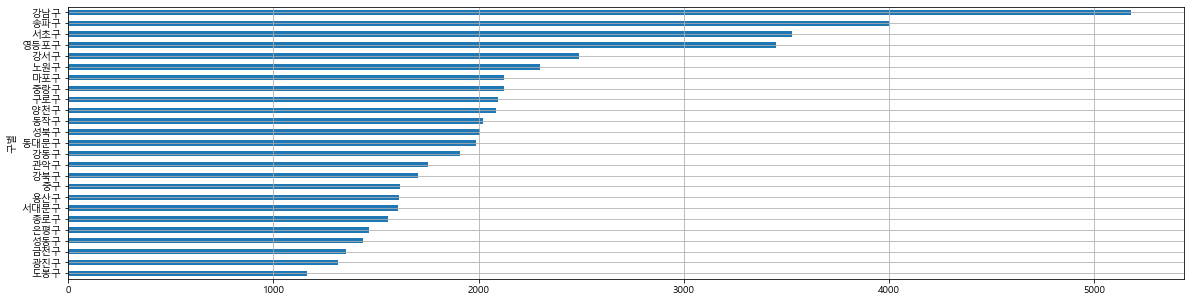

In [523]:
# 4.구별 부상자수 그래프 그리기
ncar_accident33["합계"].sort_values().plot(kind="barh",figsize=(20,5),grid=True)

In [447]:
# 사고건수는 강남구가 가장 높은데 사망자수는 강서구가 가장 높다????

In [530]:
ncol2=["과속비율","앞지르기 방법위반비율","앞지르기 금지위반비율","중앙선 침범비율","신호위반비율","안전거리 미확보비율","서행 및 일시정지위반비율","부당한 회전비율","진로양보 의무 불이행비율","안전운전 의무 불이행비율","교차로 통행방법 위반비율","보행자 보호의무 위반비율","차로위반(진로변경 위반)비율","직진 및 우회전차의 통행방해비율","기타(운전자법규위반)비율","기타위반비율"]
ncar_accident24["사망자수비율"]=np.sum(ncar_accident24[ncol2],axis=1)
ncar_accident24


,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율,사망자수비율
구별,,,,,,,,,,,,,,,,,
종로구,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.009788,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.009788
중구,0.000000,0.0,0.0,0.000000,0.005747,0.000000,0.0,0.000000,0.0,0.006944,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.012692
용산구,0.166667,0.0,0.0,0.000000,0.000000,0.004630,0.0,0.000000,0.0,0.010386,0.0,0.000000,0.000000,0.000000,0.033333,0.0,0.215015
성동구,0.000000,0.0,0.0,0.000000,0.013072,0.000000,0.0,0.000000,0.0,0.015280,0.0,0.031250,0.000000,0.038462,0.000000,0.0,0.098064
동대문구,0.500000,0.0,0.0,0.022222,0.018957,0.000000,0.0,0.000000,0.0,0.009780,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.550960
성북구,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.007772,0.0,0.029851,0.000000,0.000000,0.000000,0.0,0.037623
도봉구,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.008989,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.008989
은평구,0.000000,0.0,0.0,0.000000,0.011299,0.000000,0.0,0.000000,0.0,0.003140,0.0,0.019608,0.047619,0.066667,0.000000,0.0,0.148333
서대문구,0.000000,0.0,0.0,0.000000,0.000000,0.010870,0.0,0.000000,0.0,0.019847,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.030717


In [531]:
ncar_accident24_sort = ncar_accident24.sort_values(by='사망자수비율', ascending=False)
ncar_accident24_sort.head()

,과속비율,앞지르기 방법위반비율,앞지르기 금지위반비율,중앙선 침범비율,신호위반비율,안전거리 미확보비율,서행 및 일시정지위반비율,부당한 회전비율,진로양보 의무 불이행비율,안전운전 의무 불이행비율,교차로 통행방법 위반비율,보행자 보호의무 위반비율,차로위반(진로변경 위반)비율,직진 및 우회전차의 통행방해비율,기타(운전자법규위반)비율,기타위반비율,사망자수비율
구별,,,,,,,,,,,,,,,,,
양천구,1.000000,0.0,0.0,0.037037,0.012346,0.000000,0.0,0.000000,0.0,0.004494,0.0,0.029851,0.0,0.0,0.000000,0.0,1.083728
강동구,0.750000,0.0,0.0,0.030303,0.018293,0.000000,0.0,0.071429,0.0,0.001230,0.0,0.012500,0.0,0.0,0.015385,0.0,0.899139
구로구,0.750000,0.0,0.0,0.000000,0.012295,0.012048,0.0,0.000000,0.0,0.003501,0.0,0.015385,0.0,0.0,0.016949,0.0,0.810178
동대문구,0.500000,0.0,0.0,0.022222,0.018957,0.000000,0.0,0.000000,0.0,0.009780,0.0,0.000000,0.0,0.0,0.000000,0.0,0.550960
강서구,0.428571,0.0,0.0,0.000000,0.015936,0.011173,0.0,0.000000,0.0,0.009251,0.0,0.000000,0.0,0.0,0.023256,0.0,0.488187


Text(0.5, 1.0, '법규 위반 비율(정규화된 사망자수비율의 합으로 정렬)')

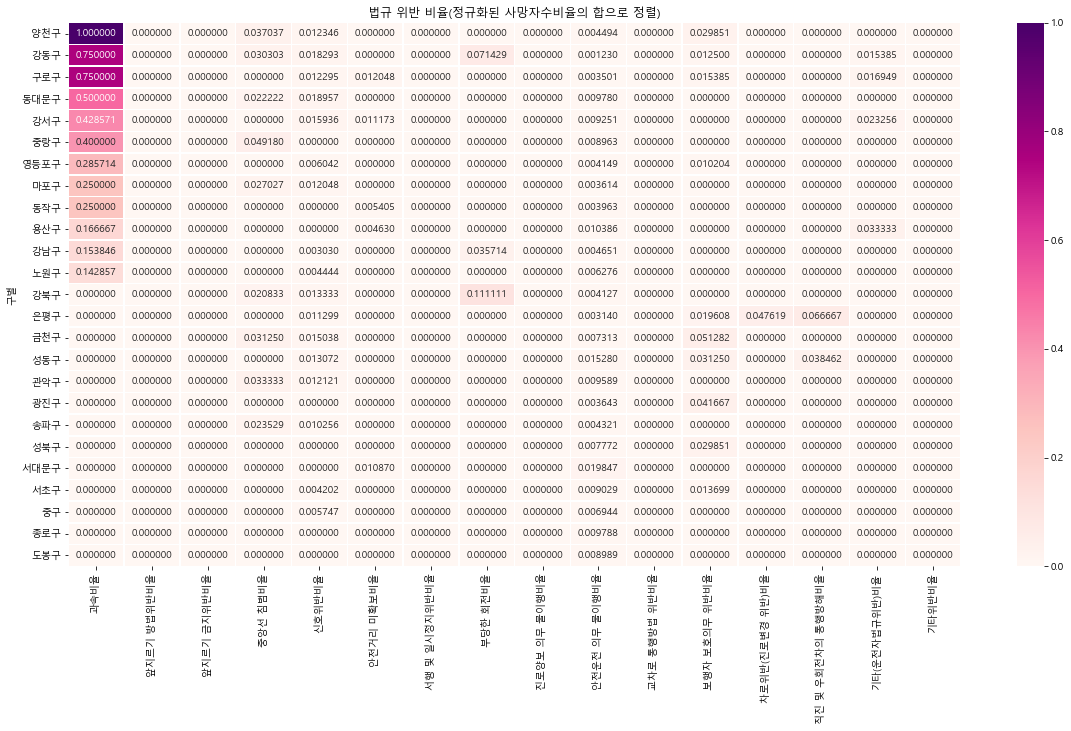

In [534]:
plt.figure(figsize=(20,10))
sns.heatmap(ncar_accident24_sort[["과속비율","앞지르기 방법위반비율","앞지르기 금지위반비율","중앙선 침범비율","신호위반비율","안전거리 미확보비율","서행 및 일시정지위반비율","부당한 회전비율","진로양보 의무 불이행비율","안전운전 의무 불이행비율","교차로 통행방법 위반비율","보행자 보호의무 위반비율","차로위반(진로변경 위반)비율","직진 및 우회전차의 통행방해비율","기타(운전자법규위반)비율","기타위반비율"]], cmap='RdPu',
           linewidths=.5,annot=True, fmt='f')
plt.title('법규 위반 비율(정규화된 사망자수비율의 합으로 정렬)')

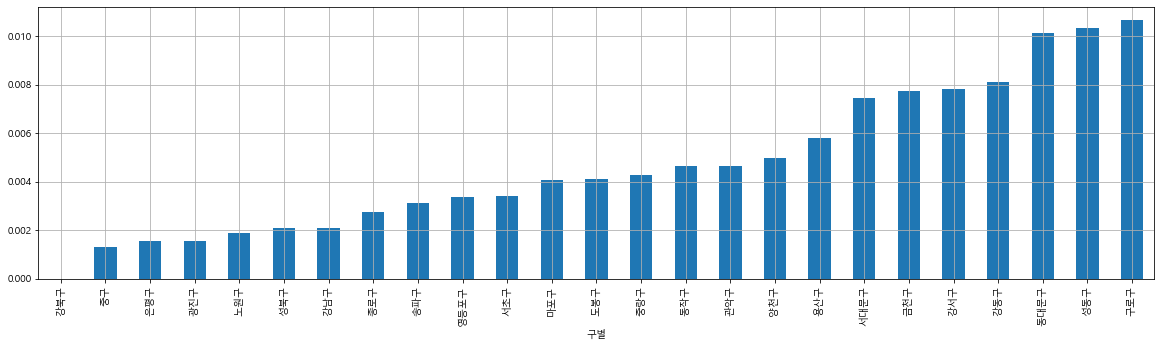

In [448]:
# 승용차~기타차량까지의 사고건수 대비 사망자수 그래프
ncar_accident14["승용차비율"].sort_values().plot(kind="bar",figsize=(20,5),grid=True)
#ncar_accident14["승합차비율"].sort_values().plot(kind="bar",figsize=(20,5),grid=True)
#ncar_accident14["화물차비율"].sort_values().plot(kind="bar",figsize=(20,5),grid=True)
#ncar_accident14["이륜차비율"].sort_values().plot(kind="bar",figsize=(20,5),grid=True)
#ncar_accident14["자전거비율"].sort_values().plot(kind="bar",figsize=(20,5),grid=True)
#ncar_accident14["기타차량비율"].sort_values().plot(kind="bar",figsize=(20,5),grid=True)



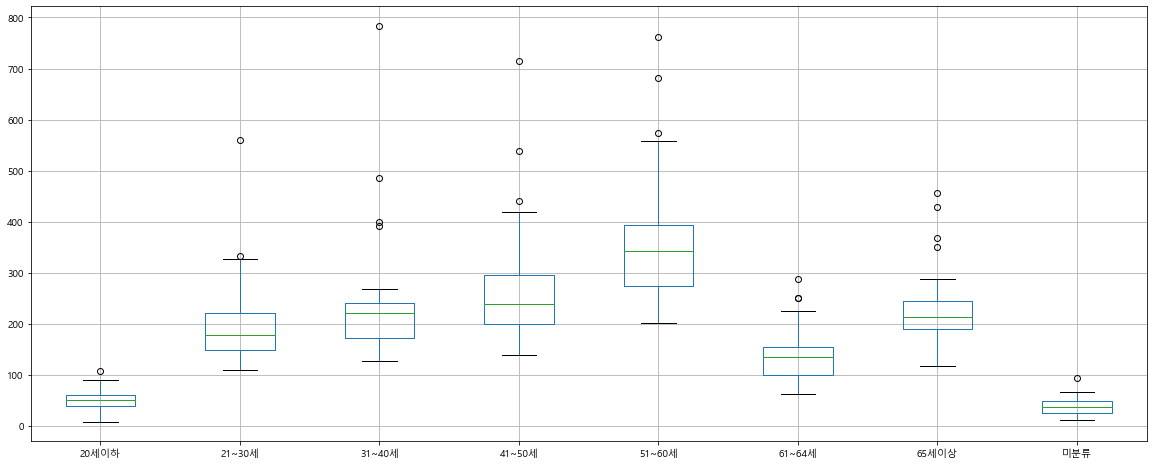

In [449]:
# 연령별 사고건수의 boxplot : 51~60세의 연령이 사고건수가 가장 많다고 보여진다. 따라서 서울시에서는 이 연령대의 교육등을 통해
#사고건수를 줄여보면 어떨까?
ncar_accident31.boxplot(column=["20세이하","21~30세","31~40세","41~50세","51~60세","61~64세","65세이상","미분류"],figsize=(20,8))

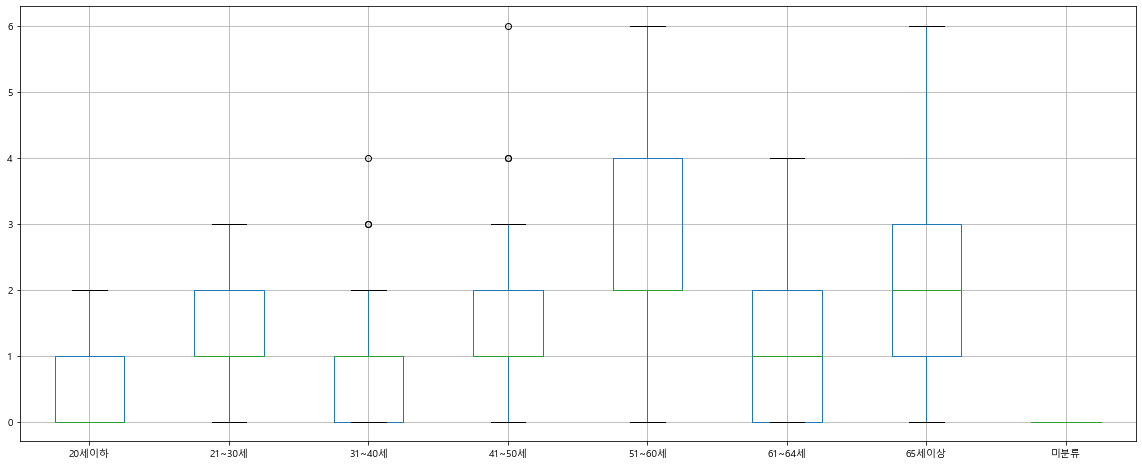

In [577]:
#연령별 사망자수의 boxplot
ncar_accident32.boxplot(column=["20세이하","21~30세","31~40세","41~50세","51~60세","61~64세","65세이상","미분류"],figsize=(20,8))


In [563]:
ncar_accident32.index

Index(['종로구', '중구', '용산구', '성동구', '동대문구', '성북구', '도봉구', '은평구', '서대문구', '마포구',
       '강서구', '구로구', '영등포구', '동작구', '관악구', '강남구', '강동구', '송파구', '서초구', '양천구',
       '중랑구', '노원구', '광진구', '강북구', '금천구'],
      dtype='object', name='구별')

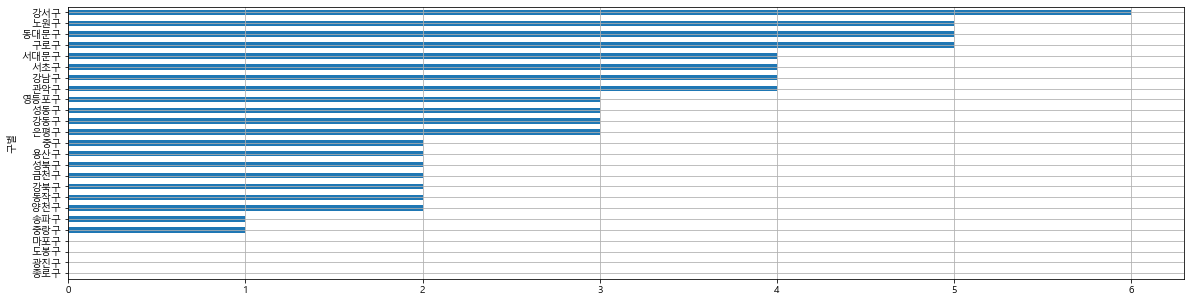

In [568]:
ncar_accident32["51~60세"].sort_values().plot(kind="barh",figsize=(20,5),grid=True)

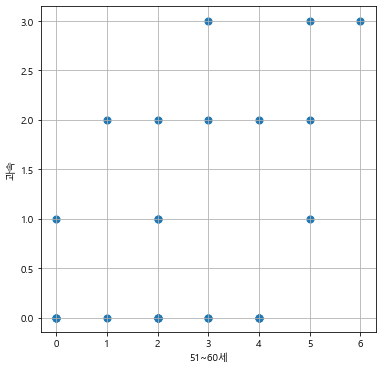

In [569]:
plt.figure(figsize=(6,6))
plt.scatter(ncar_accident32["51~60세"], ncar_accident22["과속"],s=50)
plt.xlabel("51~60세")
plt.ylabel("과속")
plt.grid()

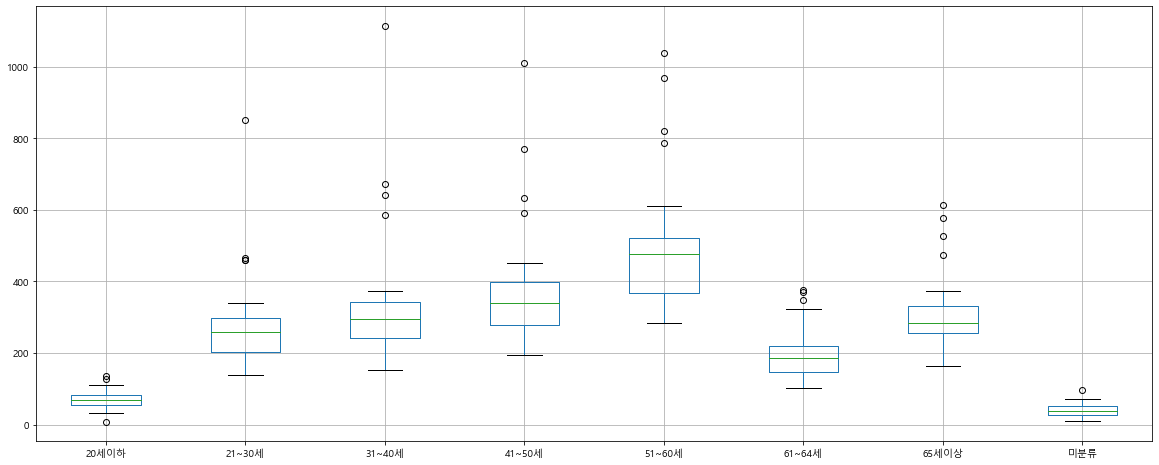

In [452]:
#연령별 부상자수의 boxplot
ncar_accident33.boxplot(column=["20세이하","21~30세","31~40세","41~50세","51~60세","61~64세","65세이상","미분류"],figsize=(20,8))

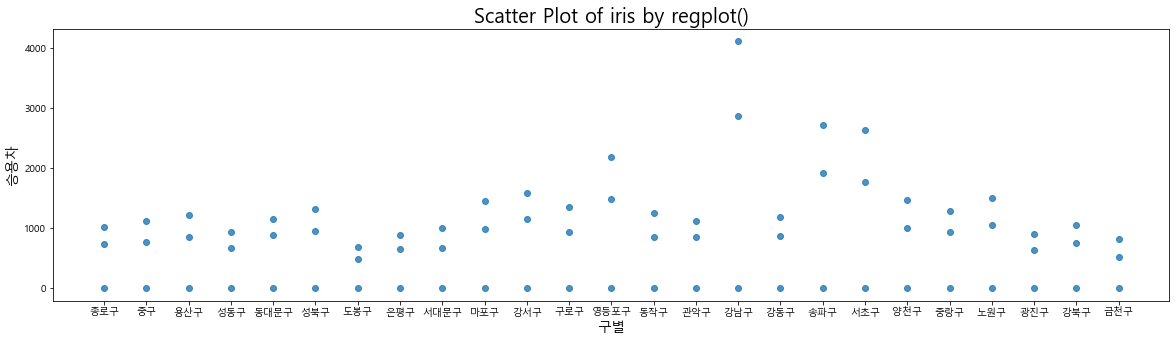

In [451]:
# 구와 차량별 산점도 
plt.figure(figsize=(20, 5))
sns.regplot(x=car_accident1['구별'], 
           y=car_accident1['승용차'], 
           fit_reg=False)

plt.title('Scatter Plot of iris by regplot()', fontsize=20)

plt.xlabel('구별', fontsize=14)

plt.ylabel('승용차', fontsize=14)

plt.show()
